# Practica analisis estadístico de empleados

In [1]:
!pip install pandas numpy matplotlib seaborn

=== DATASET BASE ===
Forma del dataset: (482, 6)

Primeras 5 filas:
   edad  salario  experiencia_años departamento  horas_trabajo_semana  \
0    38    47947                 0       Ventas             40.453955   
1    33    64397                 0           IT             38.239218   
2    40    23871                 5           IT             43.595873   
3    47    42997                 6           IT             48.702252   
4    33    29875                 0     Finanzas             32.624138   

   puntuacion_rendimiento  
0               40.870697  
1               73.173057  
2               86.573448  
3               94.707525  
4               98.123948  

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   edad                    482 non-null    int64  
 1   salario                 482 non-null    int

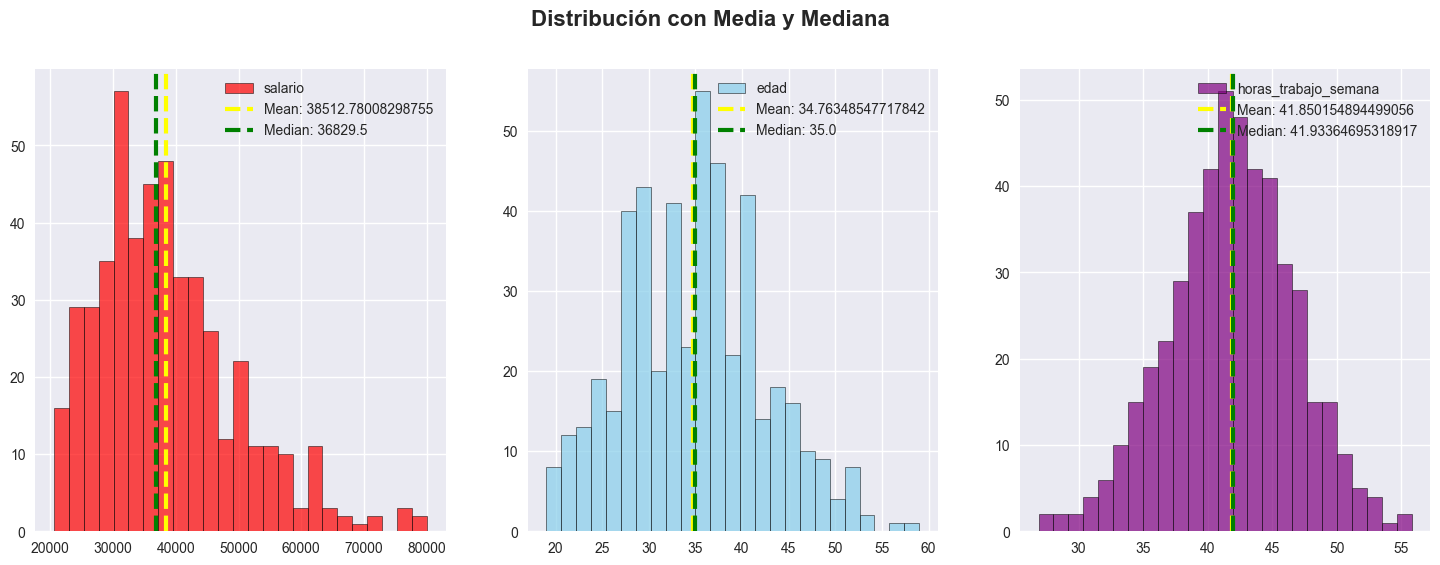

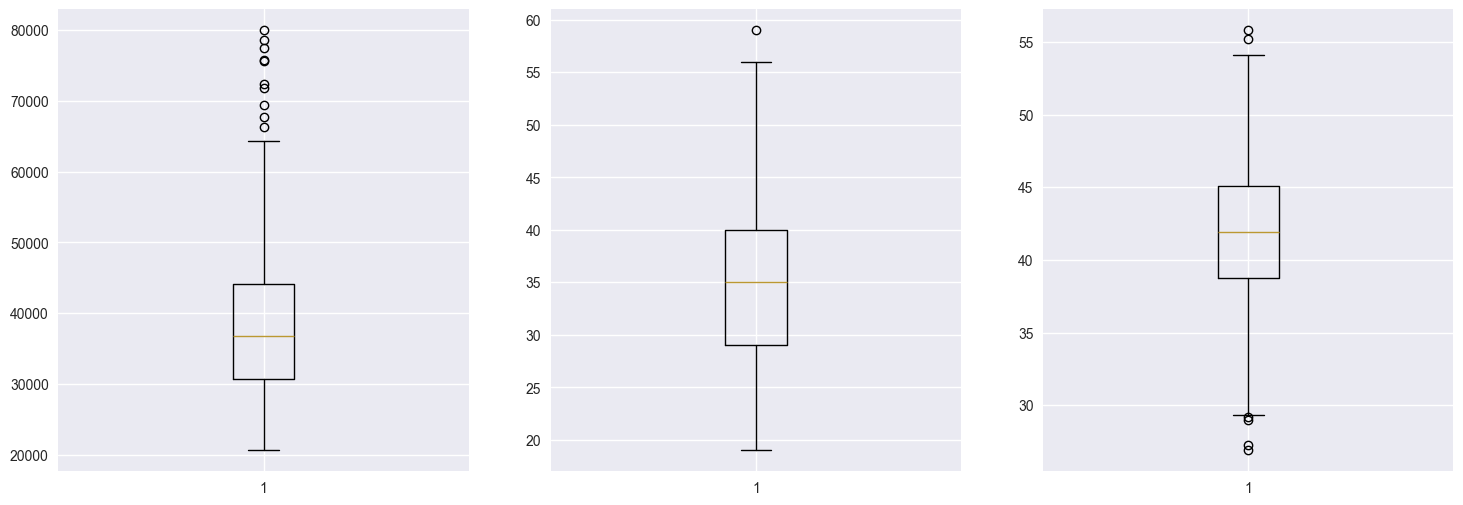

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Configuración para gráficos más elegantes
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Dataset base - Datos de empleados de una empresa
np.random.seed(42)
n_employees = 500

data = {
    'edad': np.random.normal(35, 8, n_employees).astype(int),
    'salario': np.random.lognormal(10.5, 0.3, n_employees).astype(int),
    'experiencia_años': np.random.exponential(5, n_employees).astype(int),
    'departamento': np.random.choice(['IT', 'Marketing', 'Ventas', 'RRHH', 'Finanzas'], 
                                   n_employees, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'horas_trabajo_semana': np.random.normal(42, 5, n_employees),
    'puntuacion_rendimiento': np.random.beta(2, 1, n_employees) * 100
}

df = pd.DataFrame(data)
# Limpieza de datos
df = df[(df['edad'] > 18) & (df['edad'] < 65)]
df = df[df['salario'] > 20000]
df = df[df['experiencia_años'] <= 40]

print("=== DATASET BASE ===")
print(f"Forma del dataset: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())
print("\nInfo del dataset:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())


print("---------------Respuestas------------------")
print("Ejercicio 1")

mean_salario = df['salario'].mean()
mean_edad = df['edad'].mean()
mean_horas_trabajo_semana = df['horas_trabajo_semana'].mean()

means = [mean_salario, mean_edad, mean_horas_trabajo_semana]

# plt.plot(df['edad'])
# plt.axhline(y=mean_edad)
 

print("Media: ")
print("    - Salario: ", mean_salario)
print("    - Edad: ", mean_edad)
print("    - Horas trabajo semana: ", mean_horas_trabajo_semana)

## Que interpreta la media?: que en promedio toda la muestra tiene ese salario, esa edad y trabaja esas horas por semana. Pero es un promedio

median_salario = df['salario'].median()
median_edad = df['edad'].median()
median_horas_trabajo_semana = df['horas_trabajo_semana'].median()



print("Mediana: ")
print("    - Salario: ", median_salario)
print("    - Edad: ", median_edad)
print("    - Horas trabajo semana: ", median_horas_trabajo_semana)

# mode_salario = df['salario'].mode()
# mode_edad = df['edad'].mode()
# mode_horas_trabajo_semana = df['horas_trabajo_semana'].mode()

# print("Mode: ")
# print("    - Salario: ", mode_salario)
# print("    - Edad: ", mode_edad)
# print("    - Horas trabajo semana: ", mode_horas_trabajo_semana)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))
figBox, axesBox = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribución con Media y Mediana', fontsize=16, fontweight='bold')
variables = ['salario','edad','horas_trabajo_semana']
colors = ['red','skyblue','purple']

for i, variable in enumerate(variables):
    axes[i].hist(df[variable],bins=25, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.5,label=variables[i])
    axes[i].axvline(df[variable].mean(), color='yellow', linestyle='--', linewidth=3, label=f'Mean: {df[variable].mean()}')
    axes[i].axvline(df[variable].median(), color='green', linestyle='--', linewidth=3, label=f'Median: {df[variable].median()}')
    axes[i].legend()
    axesBox[i].boxplot(df[variable])



    